In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [8]:


# Load dataset
df = pd.read_csv("data/2023_race_dataset.csv")
df.replace("na", np.nan, inplace=True)

# Drop rows with missing target
df = df[df['lap_time_seconds'].notna()]

# Define features and target
target = 'lap_time_seconds'
excluded = ['season', 'gp_name', 'driver', 'team', 'lap_number', target]
X = df.drop(columns=excluded)
y = df[target]

# Split numeric/categorical columns
categorical_cols = ['compound', 'track_status']
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_cols),
    ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

# Full pipeline with Random Forest
pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("model", RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"\n✅ Model Performance:")
print(f"RMSE: {rmse:.3f} sec")
print(f"R²: {r2:.3f}")



✅ Model Performance:
RMSE: 8.512 sec
R²: 0.617


c:\Users\shrey\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [3]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv("data/2023_race_dataset.csv")
df.replace("na", np.nan, inplace=True)
df = df[df['lap_time_seconds'].notna()]

# Features/target
y = df['lap_time_seconds']
X = df.drop(columns=['season', 'gp_name', 'driver', 'team', 'lap_number', 'lap_time_seconds'])

# Categorical / numeric
categorical_cols = ['compound', 'track_status']
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_cols),
    ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

# Transform
X_transformed = preprocessor.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Train LightGBM
model = lgb.LGBMRegressor(n_estimators=500, learning_rate=0.05, random_state=42)
model.fit(X_train, y_train)

# Predict & evaluate
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"\n🚀 LightGBM Performance:")
print(f"RMSE: {rmse:.3f} sec")
print(f"R²: {r2:.3f}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004314 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2094
[LightGBM] [Info] Number of data points in the train set: 19186, number of used features: 33
[LightGBM] [Info] Start training from score 91.340325

🚀 LightGBM Performance:
RMSE: 0.785 sec
R²: 0.997


c:\Users\shrey\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


C:\Users\shrey\AppData\Local\Temp\ipykernel_63840\2895929633.py:17: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.tight_layout()
C:\Users\shrey\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


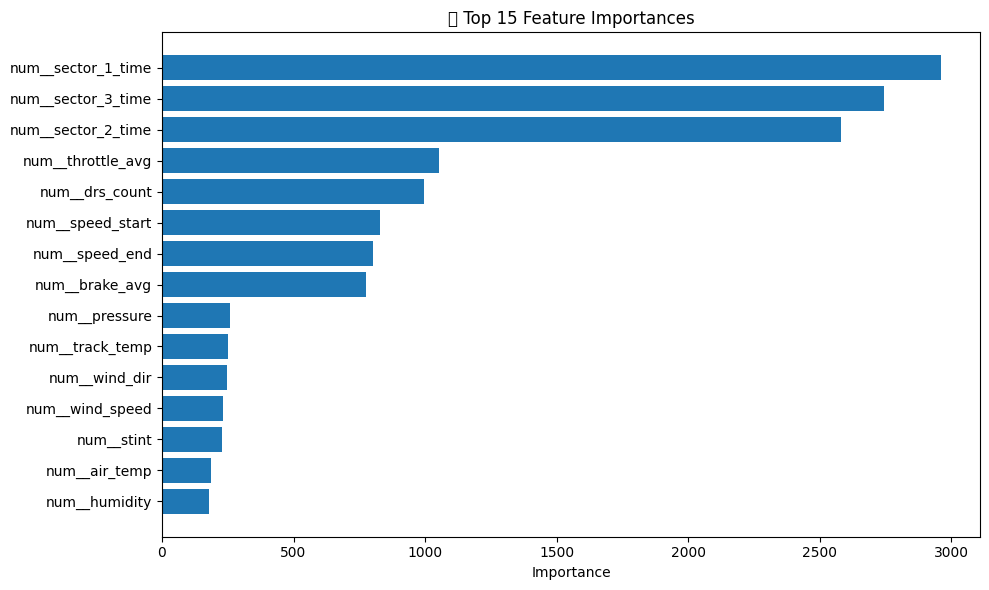

In [4]:
import matplotlib.pyplot as plt
import numpy as np

feature_names = preprocessor.get_feature_names_out()
importances = model.feature_importances_

# Combine and sort
sorted_idx = np.argsort(importances)[::-1]
top_n = 15
top_features = [feature_names[i] for i in sorted_idx[:top_n]]
top_importances = [importances[i] for i in sorted_idx[:top_n]]

plt.figure(figsize=(10,6))
plt.barh(top_features[::-1], top_importances[::-1])
plt.title("🔍 Top 15 Feature Importances")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


C:\Users\shrey\AppData\Local\Temp\ipykernel_63840\3421953853.py:9: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
C:\Users\shrey\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


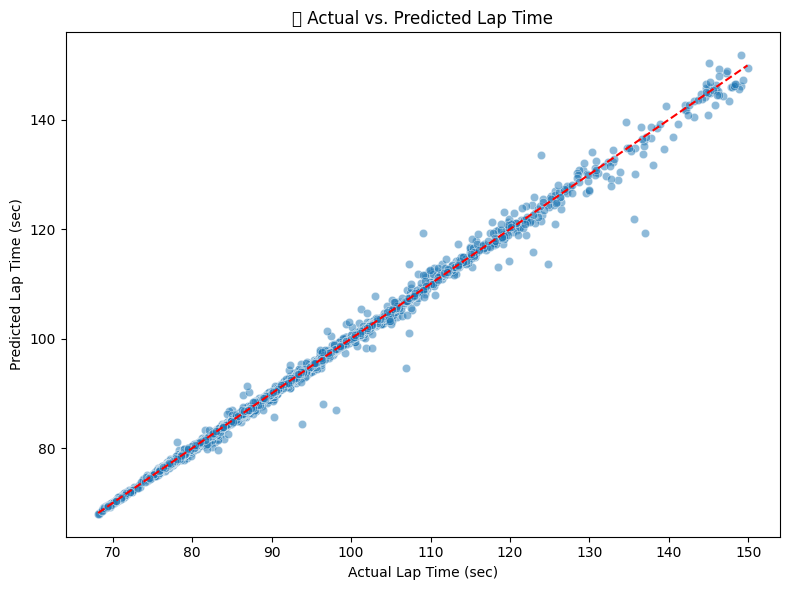

In [5]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Lap Time (sec)")
plt.ylabel("Predicted Lap Time (sec)")
plt.title("📈 Actual vs. Predicted Lap Time")
plt.tight_layout()
plt.show()


In [6]:
X_test_orig = X.iloc[y_test.index].copy()
X_test_orig['actual'] = y_test
X_test_orig['predicted'] = y_pred
X_test_orig['error'] = X_test_orig['predicted'] - X_test_orig['actual']
X_test_orig['abs_error'] = X_test_orig['error'].abs()

# Top 5 compounds with highest average error
print(X_test_orig.groupby("compound")['abs_error'].mean().sort_values(ascending=False).head())


compound
WET             0.971174
INTERMEDIATE    0.678471
SOFT            0.318526
MEDIUM          0.293928
HARD            0.263881
Name: abs_error, dtype: float64
